In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

file='../project/player_real_final.csv'
df=pd.read_csv(file)

In [34]:
df=df[['overall', 'potential','age','attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping','value_euro']]
feature=df[['overall', 'potential','age','attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping']]
target=df['value_euro']

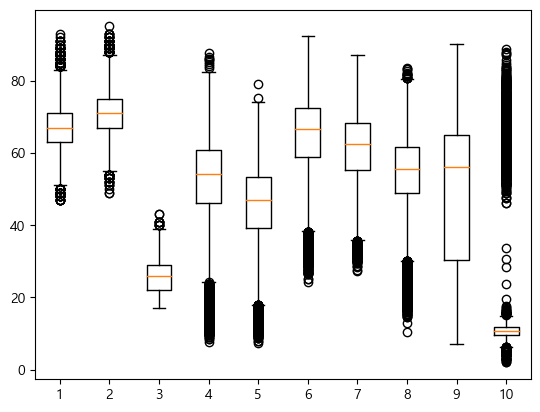

In [35]:
plt.boxplot(feature)
plt.show()

In [36]:
# 이상치가 많을 때 StandardScaler 말고 => RobustScaler 사용
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_s=scaler.fit_transform(df)

In [37]:
df_s=pd.DataFrame(df_s)
df_s.columns=['overall', 'potential','age','attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping','value_euro']
df_s

overall  potential       age  attacking     skill  movement     power  \
0        3.250      2.750  1.142857   2.164384  2.258824  1.735294  1.184615   
1        3.125      2.625  0.857143   2.178082  1.517647  1.102941  1.723077   
2        3.000      2.500  1.428571   2.287671  1.658824  1.382353  1.907692   
3        3.000      2.500  0.428571   1.808219  1.988235  1.735294  0.723077   
4        3.000      2.500  0.571429   1.863014  1.905882  0.985294  1.476923   
...        ...        ...       ...        ...       ...       ...       ...   
15081   -2.500     -2.000 -0.714286  -2.863014 -2.494118 -2.397059 -2.076923   
15082   -2.500     -0.875 -1.142857  -1.027397 -0.952941 -0.308824 -1.092308   
15083   -2.500     -1.250 -1.142857  -0.904110 -0.882353 -0.926471 -1.615385   
15084   -2.500     -1.500 -1.000000  -0.753425 -0.741176 -0.485294 -1.046154   
15085   -2.500     -2.000 -0.714286  -0.972603 -0.717647 -0.735294 -1.000000   

       mentality  defending  goalkeeping  value_euro  
0       1.434211  -0.798561     0.090909   39.896104  
1       1.973684  -0.604317    -0.181818   61.454545  
2       1.473684  -0.791367     0.454545   22.753247  
3       1.684211  -0.654676     0.545455   66.389610  
4       2.131579   0.187050     0.272727   64.571429  
...          ...        ...          ...         ...  
15081  -3.039474  -1.323741    16.181818   -0.576623  
15082  -0.671053  -0.417266     0.727273   -0.561039  
15083  -1.184211  -0.884892     0.090909   -0.566234  
15084  -0.723684  -0.395683    -0.545455   -0.566234  
15085  -1.039474  -0.381295    -1.454545   -0.571429  

[15086 rows x 11 columns]

In [38]:
df_s.corr()['value_euro']

overall        0.589850
potential      0.569162
age           -0.008165
attacking      0.261434
skill          0.269617
movement       0.242749
power          0.275179
mentality      0.295881
defending      0.116760
goalkeeping   -0.024903
value_euro     1.000000
Name: value_euro, dtype: float64

C:\Users\KDP-26-\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\KDP-26-\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\KDP-26-\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


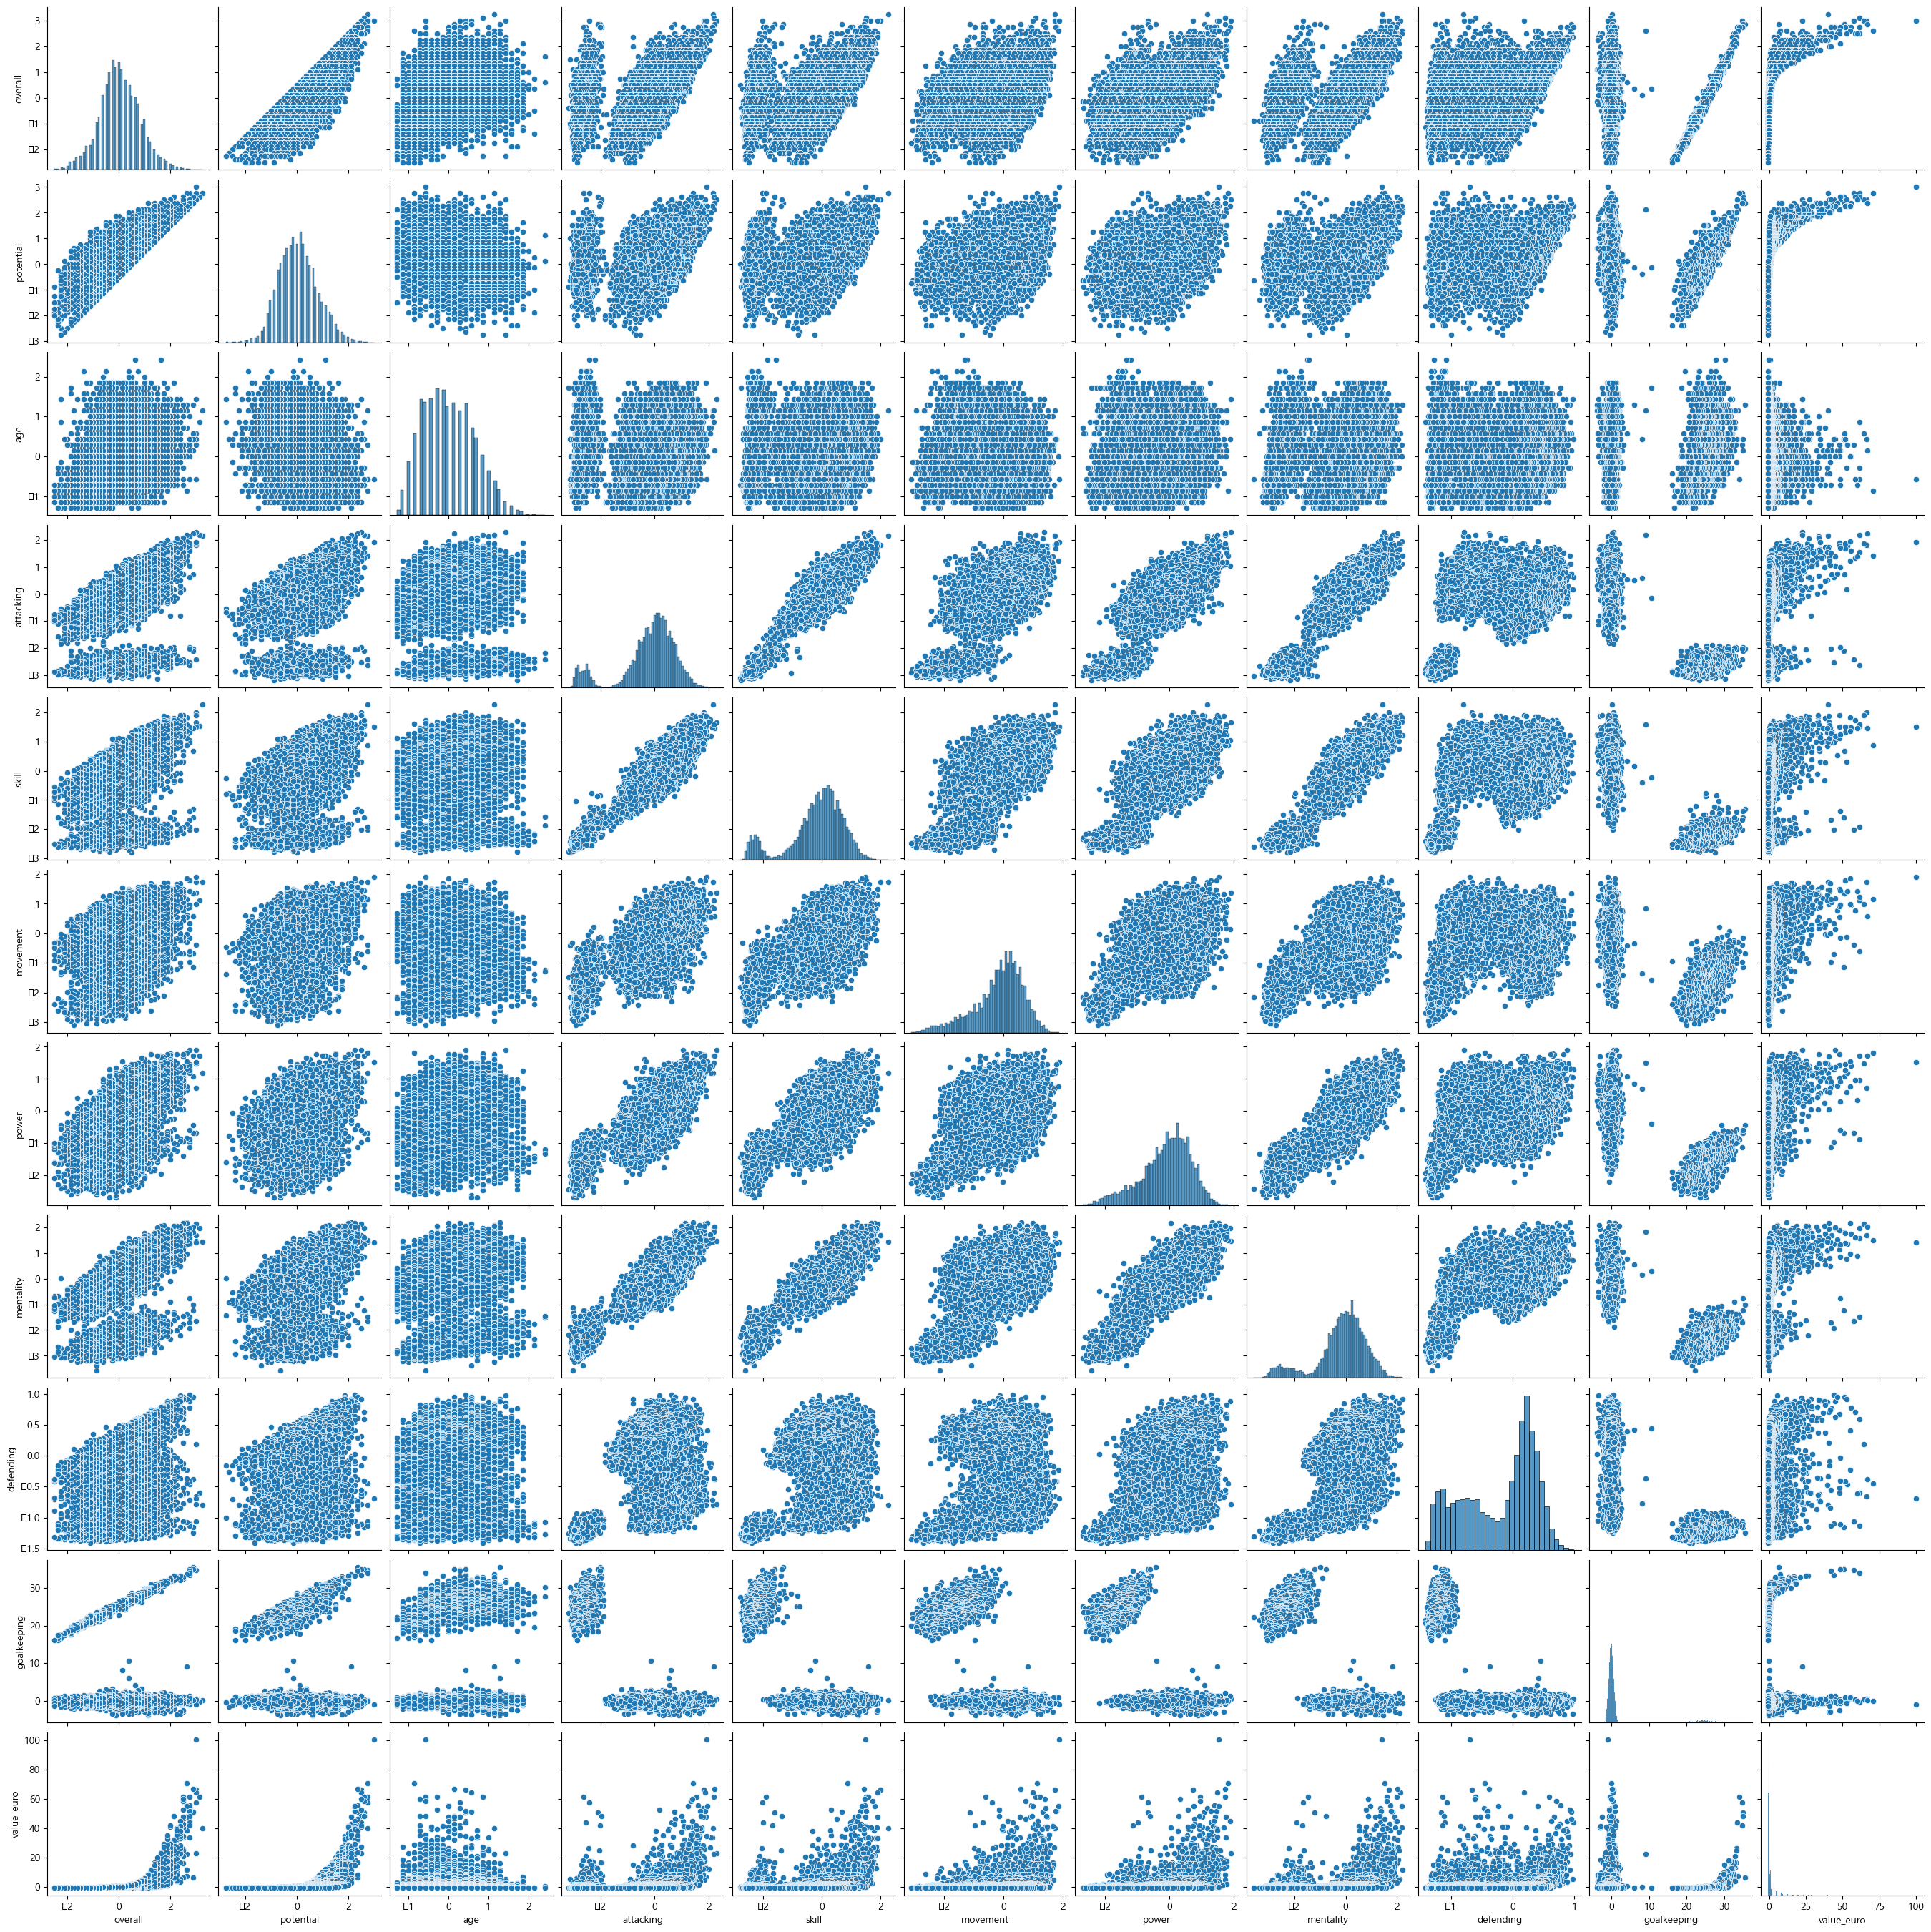

In [39]:
import seaborn as sns
sns.pairplot(df_s)

In [60]:
feature=df_s[['overall', 'potential','age','attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping']]
target=df_s['value_euro']

In [61]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, 
                                                    test_size=0.2, random_state=7 )
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                                                    test_size=0.2, random_state=7 )

## Search_model로 찾은 모델 적용
- DecisionTreeRegressor 1.0
- KNeighborsRegressor 0.92

### DecisionTreeRegressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(train_x,train_y)

DecisionTreeRegressor()

In [64]:
def get_reg_score(test_y, pred_y):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # 평균절대오차 : MAE
    mae = mean_absolute_error(test_y, pred_y)

    # 평균제곱오차 : MSE
    mse = mean_squared_error(test_y, pred_y)
    
    # 평균제곱근오차 : RMSE
    rmse = mean_squared_error(test_y, pred_y, squared=False)

    # 결정계수 : R2
    r2 = r2_score(test_y, pred_y)
    
    print(f'MAE : {mae:.4f}, MSE : {mse:.4f}, RMSE : {rmse:.4f}, R-squared : {r2:.4f}')

In [65]:
pred_y=dt_model.predict(train_x)
get_reg_score(train_y, pred_y)

MAE : 0.0000, MSE : 0.0000, RMSE : 0.0000, R-squared : 1.0000


In [66]:
pred_y=dt_model.predict(val_x)
get_reg_score(val_y, pred_y)

MAE : 0.1251, MSE : 0.5469, RMSE : 0.7395, R-squared : 0.9596


### 하이퍼 파라미터 튜닝

In [62]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [98]:
from hyperopt import hp, fmin, tpe, STATUS_OK
search_space={'max_depth':hp.quniform('max_depth',5,20,1),
             'min_samples_split':hp.quniform('min_samples_split',2,10,1),
             'min_samples_leaf':hp.quniform('min_samples_leaf',1,10,1)}

In [99]:
from sklearn.model_selection import cross_val_score

def object_func(search_space):
    # 하이퍼파라미터 적용한 모델
    dt_model_t = DecisionTreeRegressor(max_depth=int(search_space['max_depth']),
                                       min_samples_split=int(search_space['min_samples_split']))
    
    # 생성한 모델로 학습 및 평가
    result = cross_val_score(dt_model_t, train_x, train_y,
                            scoring='neg_root_mean_squared_error',
                            cv=5)
    
    # 평가 결과 반환 => HyperOpt 패키지의 fmin()함수는 최솟값을 찾음
    # - 분류 : -1을 곱해서 반환 (높은값이 좋은 거)
    # - 회귀 
    #     - 결정계수 R2 : -1을 곱해서 반환 (높은값이 좋은 거)\
    #     - 오차 관련(MAE, MSE 등) : 그대로 반환
    return {'loss':np.mean(result), 'status':STATUS_OK}

In [100]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [101]:

trial_val=Trials()

best_params = fmin(
    fn=object_func,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
)


100%|█████████████████████████████████████████████| 100/100 [00:18<00:00,  5.32trial/s, best loss: -1.3850957744272199]


In [102]:
best_params

{'max_depth': 5.0, 'min_samples_leaf': 1.0, 'min_samples_split': 2.0}

### 튜닝된 하이퍼 파라미터 적용

In [103]:
dt_model_t = DecisionTreeRegressor(max_depth=5,min_samples_split=2,min_samples_leaf=1)
dt_model_t.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=5)

In [104]:
pred_y=dt_model.predict(train_x)
get_reg_score(train_y, pred_y)

MAE : 0.3719, MSE : 0.9029, RMSE : 0.9502, R-squared : 0.9567


In [105]:
pred_y=dt_model.predict(val_x)
get_reg_score(val_y, pred_y)

MAE : 0.3893, MSE : 1.3090, RMSE : 1.1441, R-squared : 0.9032


## KNeighborsRegressor

In [106]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(train_x, train_y)

KNeighborsRegressor()

In [107]:
pred_y=dt_model.predict(train_x)
get_reg_score(train_y, pred_y)

MAE : 0.3719, MSE : 0.9029, RMSE : 0.9502, R-squared : 0.9567


In [109]:
pred_y=dt_model.predict(val_x)
get_reg_score(val_y, pred_y)

MAE : 0.3893, MSE : 1.3090, RMSE : 1.1441, R-squared : 0.9032
